# Symbolic expressions

**Reference:** [[1](https://doc.sagemath.org/html/en/reference/calculus/sage/symbolic/expression.html)]

Last time we saw the basics of symbolic expressions:
* How to define and manipulate symbolic expressions
* How to introduce new variables (in the Mathematical sense) with `var()`
* How to solve equations and inequalities
* Some of the Mathematical constants that are included in Sage, and how to approximate them using `n()`

Here are some examples to remind you of these basic things:

In [2]:
var('y', 'z') # Define new variables (x is already defined by Sage)
f = x^2 + pi
g = y^2 + y - 2 > 0
print( solve(f==0, x) )
print( solve(z^2 - f, z) )
print( solve(g, y) )
print( 2*pi + e, "is approximately", n(2*pi + e) )

[
x == -sqrt(-pi),
x == sqrt(-pi)
]
[
z == -sqrt(pi + x^2),
z == sqrt(pi + x^2)
]
[[y < -2], [y > 1]]
2*pi + e is approximately 9.00146713563863


Now we will see some more details about solving equations and manipulating their solutions.

## Solving equations and inequalities

**Reference** [[1](https://doc.sagemath.org/html/en/reference/calculus/sage/symbolic/expression.html)] for the details of `solve()` and `find_root()`, [[2](https://doc.sagemath.org/html/en/reference/calculus/sage/symbolic/relation.html#solving)] for examples.

Other than equations and inequalities, we can also solve systems: it is enough to give Sage a list of expressions and a list of variables with respect to which we want to solve. For example the system

\begin{align*}
    \begin{cases}
        x + y = 2 \\
        2x - y = 6
    \end{cases}
\end{align*}

Can be solved as

In [40]:
solve([x+y == 2, 2*x - y == 6], [x,y])

[[x == (8/3), y == (-2/3)]]

**Exercise.** Find the intersection of the circle of radius $2$ centered in the origin and the parabula of equation $y=x^2-2x^2+1$.

### The set of solutions

One would expect the result of `solve()` to be a list of solutions, but it is actually a list of expressions (technically it is not a list but a different type of Python collection, but this is not so important)

In [37]:
solutions = solve(x^2-9 == 0, x)
solutions[0] # This is the expression 'x == -3'

x == -3

To read the actual solution without the `x ==` part you can use the `rhs()` or `lhs()` functions, which can be applied to any expression containing a relation operator (like `==`, `<`, `>=`...) and return the *right hand side* and *left hand side* of the expression, respectively

In [41]:
f =  x == 2
print("rhs:", f.rhs())
print("lhs:", f.lhs())

rhs: 2
lhs: x


When you solve an inequality or a system, the set of solutions can be more complicated to describe. In this case the result is a list containing lists of expressions that have to be `True` at the same time. It is easier to explain with an example:

In [38]:
print("Simple inequality:", solve(x^2-9 > 0, x))
print("System of inequalities:\n", solve([x^2-9 > 0, x < 6], x))

Simple inequality: [[x < -3], [x > 3]]
System of inequalities:
 [
[3 < x, x < 6],
[x < -3]
]


In the last example (system of inequalities), Sage is telling us that the system
\begin{align*}
    \begin{cases}
        x^2-9 > 9 \\
        x < 6
    \end{cases}
\end{align*}
has two solutions:
* $x$ is between $3$ and $6$;
* $x$ is less than $-3$.

Since in Sage (and in Python) expressions can have at most on relational operator like `<`, the first solution requires two expressions to be described. Hence the "list of lists".


**Exercise.** In the first exercise you were asked to solve a system of equations, but some of its solutions were complex numbers. Select only the real solutions and print them as pairs $(x,y)$.

When solving a system of equations (not inequalities), you can use the option `solution_dict=True` to have the solutions arranged as a *dictionary*, which is a type of Python collection that we did not treat in this course

In [44]:
solve([x+y == 2, 2*x - y == 6], [x,y], solution_dict=True)

[{x: 8/3, y: -2/3}]

### Alternative method for real roots: `find_root()`

The `solve()` method is very useful when solving *symbolic* equations, for example when you have two variables and you want to solve for one of them in terms of the other. However, it does not always find explicit solutions.

When you want to find an explicit, even if approximate, solution, it can be better to use `find_root()`. This function works *numerically*, which means that it finds an approximation of the root. It only works for real solutions and you need to specify an interval where you want the root to be searched:

In [52]:
f = e^x + x - 10
print("Using solve():\n", solve(f, x))
print("Using find_root():", f.find_root(0,100))

Using solve():
 [
x == -e^x + 10
]
Using find_root(): 2.070579904980303


## Evaluating functions

If an expression contains only one variable you can evaluate it easily, even if it is not a function.

In [21]:
var('y')
f = x^2-3
g = x > x^2

print(f(2))
print(g(3+y))

1
y + 3 > (y + 3)^2


If an expression contains more than one variable, you can specify a value for each of them and they will be substituted in alphabetic order. You can also specify a value only for some of the variables.

In [38]:
var('y','z')

f = y*z^2 - y == z
print(f(2, 0))
print(f(z=2))

-2 == 0
3*y == 2


## Symbolic computations

Sage can understand and simplify symbolic expressions such as sums (finite or infinite) and products. In the following cell, we compute the following sums using the [`sum()`](https://doc.sagemath.org/html/en/reference/calculus/sage/symbolic/expression.html#sage.symbolic.expression.Expression.sum) function:

\begin{align*}
    \begin{array}{llcc}
        (1) & \sum_{k=0}^nk                 &=&\frac{n^2+n}{2}\\
        (2) & \sum_{k=0}^nk^4               &=&\frac{6n^5+15n^4+10n^3-n}{30}\\
        (3) & \sum_{k=0}^n\binom nk         &=& 2^n\\
        (4) & \sum_{k=0}^\infty \frac1{k^2} &=& \frac{\pi^2}{6}
    \end{array}
\end{align*}

In [22]:
var('k', 'n') # Remember to declare all variables

s = []
s.append(  sum(k, k, 0, n)  )
s.append(  sum(k^4, k, 0, n)  )
s.append(  sum(binomial(n,k), k, 0, n) )
s.append(  sum(1/k^2, k, 1, infinity)  )

for i in range(len(s)):
    print("({}) {}".format(i+1, s[i]))

(1) 1/2*n^2 + 1/2*n
(2) 1/5*n^5 + 1/2*n^4 + 1/3*n^3 - 1/30*n
(3) 2^n
(4) 1/6*pi^2


An alternative notation is `expression.sum(k, a, b)`. There is an analogous [`prod()`](https://doc.sagemath.org/html/en/reference/calculus/sage/symbolic/expression.html#sage.symbolic.expression.Expression.prod) for products.

Sometimes Sage tries to keep an expression in its original form without expanding out sums and products. To change this behavior you can use the [`expand()`](https://doc.sagemath.org/html/en/reference/calculus/sage/symbolic/expression.html#sage.symbolic.expression.Expression.expand) function:

In [30]:
f = (x+1)^2 - (x-1)^2
print(f)
print(f.expand())

(x + 1)^2 - (x - 1)^2
4*x


### The Symbolic Ring
**Reference:** [[3](https://doc.sagemath.org/html/en/reference/calculus/sage/symbolic/ring.html)]

The symbolic expressions that we have seen so far live in a ring called *symbolic ring* and denoted by `SR` in Sage. This ring works like the ring `ZZ` of integers or `RR` of reals numbers. In particular, you can define matrices and other objects using it as a "basis".

In [45]:
var('a', 'b', 'c', 'd')

M = matrix([[a,b], [c,d]])
print(M.determinant())

polring.<x> = SR[]
f = x^2 + 2*a*x + a^2
print(f.roots())

-b*c + a*d
[(-a, 2)]


**Exercise.** Compute the eigenvalues of the matrix
\begin{align*}
\begin{pmatrix}
\cos \alpha & \sin \alpha\\
-\sin\alpha & \cos \alpha
\end{pmatrix}
\end{align*}

# Calculus
**Reference:** [[4](https://doc.sagemath.org/html/en/reference/calculus/index.html)] for an overview, but most functions are described in [[1](https://doc.sagemath.org/html/en/reference/calculus/sage/symbolic/expression.html)]

## Limits and series

**References:** [[5](https://doc.sagemath.org/html/en/reference/calculus/sage/calculus/calculus.html#sage.calculus.calculus.limit)] for limits, [[6](https://doc.sagemath.org/html/en/reference/calculus/sage/symbolic/expression.html#sage.symbolic.expression.Expression.series)] for series

You can compute limits

In [54]:
f = sin(x)/x
# print(f(0)) # This one gives an error
print( f.limit(x=0) )

print( (e^(-x)).limit(x=infinity) )

1
0


**Exercise.** Compute the constant $e$ using a limit.

You can also specify a direction for the limit. If you don't, Sage assumes that you want to take a two-sided limit.

In [55]:
f = abs(x)/x  # 1 if x>0, -1 if x<0
print( f.limit(x=0) ) # undefined
print( f.limit(x=0, dir="+") )
print( f.limit(x=0, dir="-") )

und
1
-1


There is also the alternative notation `limit(f, x, dir)` which does the same as `f.limit(x, dir)`.

You can also compute series expansions up to any order. **Watch out:** the notation uses `==` instead of `=` as `limit()` does.

In [56]:
f = e^x
g = sin(x) - 2*cos(x)
h = log(x)

print(f.series(x==0, 3))
print(g.series(x==0, 7))
print(h.series(x==1, 3))

1 + 1*x + 1/2*x^2 + Order(x^3)
(-2) + 1*x + 1*x^2 + (-1/6)*x^3 + (-1/12)*x^4 + 1/120*x^5 + 1/360*x^6 + Order(x^7)
1*(x - 1) + (-1/2)*(x - 1)^2 + Order((x - 1)^3)


## Derivatives
**References:** [[7](https://doc.sagemath.org/html/en/reference/calculus/sage/symbolic/expression.html#sage.symbolic.expression.Expression.derivative)] and [[8](https://doc.sagemath.org/html/en/reference/calculus/sage/calculus/functional.html#sage.calculus.functional.derivative)] for derivatives, [[9](https://doc.sagemath.org/html/en/reference/calculus/sage/calculus/functions.html#sage.calculus.functions.jacobian)] for the Jacobian matrix and [[10](https://doc.sagemath.org/html/en/reference/calculus/sage/symbolic/expression.html#sage.symbolic.expression.Expression.hessian)] for the Hessian.

When computing derivatives, you need to specify with respect to which variables you want to derive, except in case there is only one.

In [57]:
var('y')
print( (x^2+2*y^4).derivative(y) ) # Alternative: derivative(f, y)
print( (2*x^3-x+2).derivative() )

8*y^3
6*x^2 - 1


You can also compute higher order derivatives:

In [58]:
print( (x^3).derivative(x, x) ) # Same as (x^3).derivative(x, 2)

f = x^7*y^2 + x^4*y^2 - 2*x^3 + x^2*y^5 + y + 2
print( f.derivative(x, x, y) )    # Twice in x, once in y
print( f.derivative(x, 4, y, 2) ) # 4 times in x, twice in y

6*x
84*x^5*y + 10*y^4 + 24*x^2*y
1680*x^3 + 48


Jacobian and Hessian matrices are also easy to compute:

In [59]:
f = (-x^2 + 2*x*y, y^3, x+y+x*y)
print( jacobian(f, [x,y]), "\n" )

g = x^2 + x*y + y^3 -2*x*y^2 -3
print( g.hessian() )

[-2*x + 2*y        2*x]
[         0      3*y^2]
[     y + 1      x + 1] 

[         2   -4*y + 1]
[  -4*y + 1 -4*x + 6*y]


*Note:* the notation `f.jacobian([x,y])` is also valid, but only if you specify that `f` is vector by declaring it as `f = vector([...])`.

## Integrals
**References:** [[11](https://doc.sagemath.org/html/en/reference/calculus/sage/symbolic/integration/integral.html)] for symbolic integration and [[12](https://doc.sagemath.org/html/en/reference/calculus/sage/calculus/integration.html)] for numerical methods.

You should remember from high school or from your first calculus/analysis course that derivatives are easy, but integrals are hard.
When using a computer software to solve your integrals, you have two choices:

1. You can try to compute a primitive function exactly, and then (if you are computing a definite integral) substitute the endpoints of your integration interval to get the result. We can call this *symbolic integration*.
2. You can get an *approximated* result with a *numerical method*. This method always gives some kind of result, but it cannot be used to compute indefinite integrals.

Sage can do both of these things, although people that work in numerical analysis and use often the second method tend to prefer other programs, such as Matlab (or its open-source clone Octave).

### Symbolic integration

Symbolic integrals work more or less like derivatives. You must specify an integration variable, but the endpoints of the integration interval are optional. If they are not given you get an indefinite integral.

In [60]:
var('a', 'b')
f = x + sin(x)
print( f.integral(x) ) # Alternative: integral(f, x)
print( f.integral(x, -10, 10) )
print( f.integral(x, a, b) )

1/2*x^2 - cos(x)
0
-1/2*a^2 + 1/2*b^2 + cos(a) - cos(b)


Your endpoints can also be $\pm\infty$:

In [61]:
print( integral(e^(-x),   x, 0,         infinity) )
print( integral(e^(-x^2), x, -infinity, infinity) )

1
sqrt(pi)


The last function is also an example of an integral that perhaps you might want to compute numerically. In fact:

In [65]:
print( integral(e^(-x^2), x) )
print( integral(e^(-x^2), x, 1, 2) )

1/2*sqrt(pi)*erf(x)
1/2*sqrt(pi)*erf(2) - 1/2*sqrt(pi)*erf(1)


Here `erf(x)` denotes the [error function](https://en.wikipedia.org/wiki/Error_function).

### Numerical integration

In order to get an explicit value for the computations above, we can use a *numerical* method.

The word "numerical" does not have much to do with numbers, but it refers to the fact that we are trying to compute explicit results rather than symbolic or algebraic ones. [Numerical analysis](https://en.wikipedia.org/wiki/Numerical_analysis) is the branch of mathematics that studies methods to approximate computations over the real or complex numbers. With these methods there is usually a trade-off between speed and precision.

The Sage function [`numerical_integral()`](https://doc.sagemath.org/html/en/reference/calculus/sage/calculus/integration.html#sage.calculus.integration.numerical_integral) takes as a parameter a real-valued one-variable function and the integration endpoints, and it returns both an approximate value for the integral and an error estimate.

In [40]:
numerical_integral(e^(-x^2), 1, 2)

(0.13525725794999466, 1.5016572202374808e-15)

The result above means, in symbols
\begin{align*}
\int_1^2 e^{-x^2}\mathrm dx = 0.13525725794999466 \pm 1.5016572202374808\times 10^{-15}
\end{align*}

There is also a [`monte_carlo_integral()`](https://doc.sagemath.org/html/en/reference/calculus/sage/calculus/integration.html#sage.calculus.integration.monte_carlo_integral) method for functions with more than one variable.

**Exercise.** Compute the area of the ellipse of equation $y^2+\left(\frac x3\right)^2=1$.

## Differential equations
**Reference:** [[13](https://doc.sagemath.org/html/en/reference/calculus/sage/calculus/desolvers.html)]

A [differential equation](https://en.wikipedia.org/wiki/Differential_equation) is an equation involving an unknwon function and its derivatives. They can be of two kinds: *ordinary* differential equations ([ODE](https://en.wikipedia.org/wiki/Ordinary_differential_equation)) and *partial* differential equations ([PDE](https://en.wikipedia.org/wiki/Partial_differential_equation)). The latter involve multivariate functions and their partial derivatives.

Differential equations are in general hard to solve *exactly* (or *symbolically*): even a simple equation of the form $f'(x)=g(x)$, where $g(x)$ is someknown function, requires solving the integral $\int g(x)\mathrm{d}x$ in order to find $f$, which as we know is not always easy!

Theoretical results on differential equations usually ensure the existence and/or uniquess of a solution under certain conditions, but in general they do not give a way to solve them. There exits many methods to find approximate solutions, and some of them are implemented in Sage as well (see [[13](https://doc.sagemath.org/html/en/reference/calculus/sage/calculus/desolvers.html)]). However we will focus on the simple ODEs that can be solved exactly.

Let's start with a simple example. Let's find all functions $f(x)$ such that $f'(x)=f(x)$. In order to do so, we need to use the `function()` construct, which allows us to define an "unknwon" function inside Sage, like we define variables with `var()`.

In [4]:
var('x')
function('f')
equation = derivative(f(x)) == f(x)
desolve(equation, f(x)) # f is the unknown function

_C*e^x

As you can expect, they are all the functions $Ce^x$ for some constant $C$. The constant $C$ plays the same role as the constant in the solution of an integral, but in this case Sage writes it explicitly.

We can also specify *initial conditions* for our function. For example we can impose that $f(0)=3$ as follows:

In [5]:
desolve(equation, f(x), (0,3))

3*e^x

You can also solve *second order* equations, that is equations where the second derivative also appears. In this case if you want to specify an initial condition you should write the triple of values $(x_0, f(x_0), f'(x_0))$.

In [6]:
equation = derivative(f(x), x, 2) + x*derivative(f(x)) == 1
desolve(equation, f(x), (0, 0, 0))

-1/2*I*sqrt(2)*sqrt(pi)*integrate(erf(1/2*I*sqrt(2)*x)*e^(-1/2*x^2), x)

**Exercise.** Use Sage to find out the functions $f(x)$ that satisfy
\begin{align*}
    \begin{array}{rlcrl}
        (A) &
        \begin{cases}
            f(0)   &= 1\\
            f'(0)  &= 0\\
            f''(x) &= -f(x)
        \end{cases}
        & \qquad \qquad &
        (B) &
        \begin{cases}
            f(0)   &= 0\\
            f'(0)  &= 1\\
            f''(x) &= -f(x)
        \end{cases}
    \end{array}
\end{align*}

### A real-world example

Differential equations have countless applications in Science, so it would be a shame not to see at least a simple one.

Consider an object moving with constant acceleration $a$. Its velocity at time $t$ is described by the formula $v(t) = v(0) + at$. For example an object falling from the sky has acceleration $g\sim 9.8 m/s^2$ towards the ground, so its velocity is $v(t) = -gt$.

However in the real world you need to take into account the air's resistance, which depends (among other things) on the velocity of the object. In this case the acceleration $a(t)$ is not constant anymore, and it satisfies an equation of the form $a(t)=-g -kv(t)$, where $k$ is some constant that may depend on the shape and mass of the object (in practice it may be more complicated than this).

Since the acceleration is the derivative of the velocity, we have a differential equation
\begin{align*}
    v'(t) = -g -kv(t)
\end{align*}
and we can try to solve it with Sage!

In [7]:
var('t')
function('v')
g = 9.8
k = 1.5
conditions = (0, 0) # Start with velocity 0
desolve(derivative(v(t)) == -g -k*v(t), v(t), conditions)

-98/15*(e^(3/2*t) - 1)*e^(-3/2*t)

If you want to solve this equation symbolically (that is, keeping $g$ and $k$ in symbols) you need to specify that $t$ is the *independent variable* of the equation:

In [10]:
var('t', 'g', 'k')
function('v')
conditions = (0, 0) # Start with velocity 0
desolve(derivative(v(t)) == -g -k*v(t), v(t), conditions, ivar=t)

-(g*e^(k*t) - g)*e^(-k*t)/k

# Basic data analysis and visualization

## Statistics
**References:** [[14](https://doc.sagemath.org/html/en/reference/stats/sage/stats/basic_stats.html)]

Sage includes the most basic functions for statistical analysis.

In [20]:
L = [1, 2, 3, 3, -6, -2, 4, -1, 0, 2, 3, -4, 0]

print("Values:\t", L)

print("Mean:\t\t\t",           mean(L))
print("Median:\t\t\t",         median(L))
print("Mode:\t\t\t",           mode(L))

print("Standard deviation:\t", std(L))
print("Variance:\t\t",         variance(L))

print("Moving average (5):", moving_average(L,5))

Values:	 [1, 2, 3, 3, -6, -2, 4, -1, 0, 2, 3, -4, 0]
Mean:			 5/13
Median:			 1
Mode:			 [3]
Standard deviation:	 2*sqrt(29/13)
Variance:		 116/13
Moving average (5): [3/5, 0, 2/5, -2/5, -1, 3/5, 8/5, 0, 1/5]


You can also compare your data to a probability distribution, see [this page](https://doc.sagemath.org/html/en/reference/probability/sage/probability/probability_distribution.html). If you need to do more advanced statistics you should consider using [R](https://www.r-project.org/); you can also use it inside Sage.

## Plotting
**Reference:** [[15](https://doc.sagemath.org/html/en/reference/plotting/index.html)], more specifically the subsection [[16](https://doc.sagemath.org/html/en/reference/plotting/sage/plot/plot.html)].

Some Sage objects can be plotted:

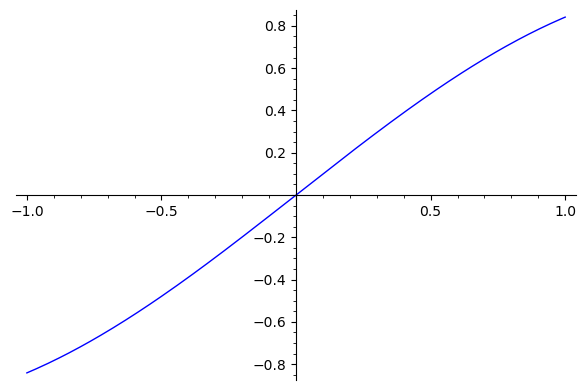

In [21]:
f = sin(x)
plot(f)

Sage's plotting functions are based on Python's [matplotlib](https://matplotlib.org/).

You can give a number of options to adjust the aspect of your plot, see [here](https://doc.sagemath.org/html/en/reference/plotting/sage/plot/plot.html#sage.plot.plot.plot). Let's see some of them:

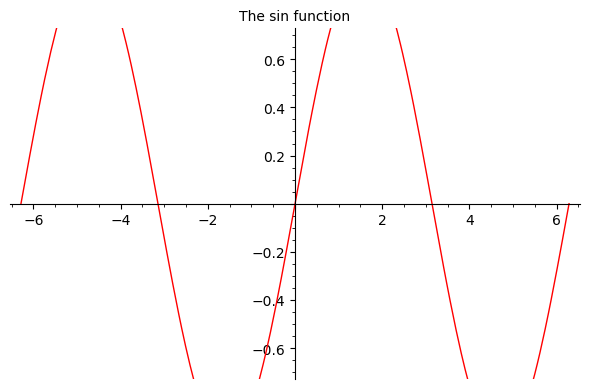

In [67]:
f = sin(x)
plot(f,
     -2*pi, 2*pi,                   # bounds for x
     ymin  = -0.7, ymax = 0.7,      # bounds for y
     color = "red",
     title = "The sin function",
    )

Some of the options are not described precisely in Sage's documentation, but you can find them on [matplotlib's documentation](https://matplotlib.org/stable/contents.html). You can find many examples online for adjusting your plot as you like!

If you need to plot more than one object at the time, you can sum two plots and show them together with `show()`:

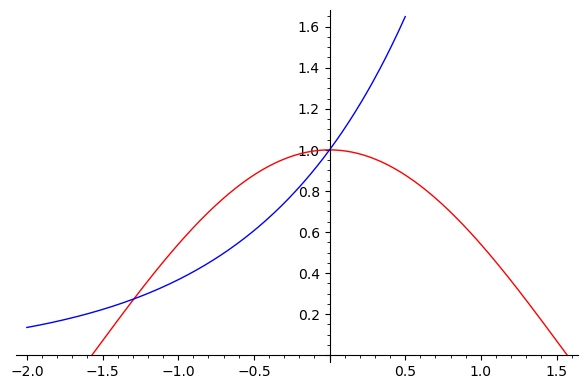

In [36]:
cosine      = plot(cos(x), (x,-pi/2,pi/2), color="red")
exponential = plot(exp(x), (x,-2,0.5))

show(cosine + exponential)

Finally, there are other types of plots that you can use, like [scatter plots](https://doc.sagemath.org/html/en/reference/plotting/sage/plot/scatter_plot.html#sage.plot.scatter_plot.scatter_plot) and [bar charts](https://doc.sagemath.org/html/en/reference/plotting/sage/plot/bar_chart.html#sage.plot.bar_chart.bar_chart). You can also add [text](https://doc.sagemath.org/html/en/reference/plotting/sage/plot/text.html#sage.plot.text.text) to your plot:

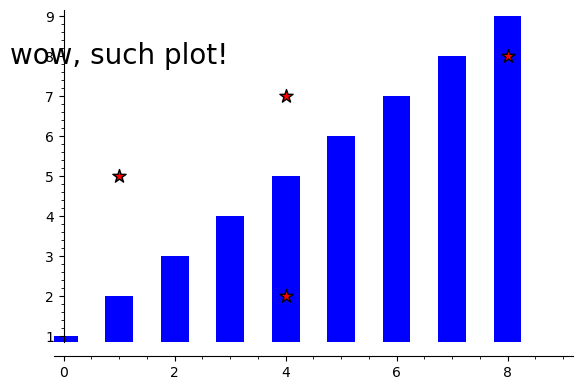

In [53]:
b = bar_chart(range(1,10))
s = scatter_plot([(1,5), (4,2), (8,8), (4,7)],
                 marker = "*",       # symbol
                 markersize = 100,
                 edgecolor  = "black",
                 facecolor  = "red"
                )
t = text("wow, such plot!", (1, 8), color="black", fontsize=20)
show(b + s + t)

## Interpolation
**References:** [[17](https://doc.sagemath.org/html/en/reference/polynomial_rings/sage/rings/polynomial/polynomial_ring.html#sage.rings.polynomial.polynomial_ring.PolynomialRing_field.lagrange_polynomial)] and [[18](https://doc.sagemath.org/html/en/reference/calculus/sage/calculus/interpolation.html)].

When you need to work with a discrete set of data, like measurements of real-world quantities, it can be useful to visualize a "smoothed out" version of this data, for example by plotting a function that approximates it.

One way to do so is finding the lowest-degree polynomial that passes through all your points. This is called [Lagrange Polynomial](https://en.wikipedia.org/wiki/Lagrange_polynomial).

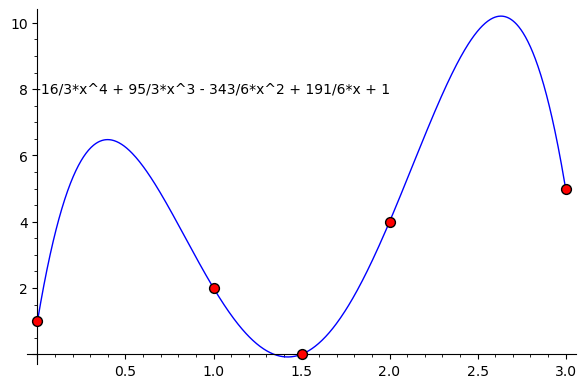

In [65]:
points = [ (0,1), (1,2), (1.5,0), (2,4), (3,5) ]
polring.<x> = QQ[] # you need to specify a polynomial ring
lp = polring.lagrange_polynomial(points)
show(scatter_plot(points, facecolor="red")
     + plot(lp, 0, 3) # slightly different notation for polynomials
     + text(lp, (1,8), color="black")
    )

One can compute the Lagrange Polynomial over any base ring, and it has the advantage that it is a very "nice" function (continuous and differentiable as much as you like, with easily computable derivatives and primitives).

However, it does not always give you good approximation of your data:

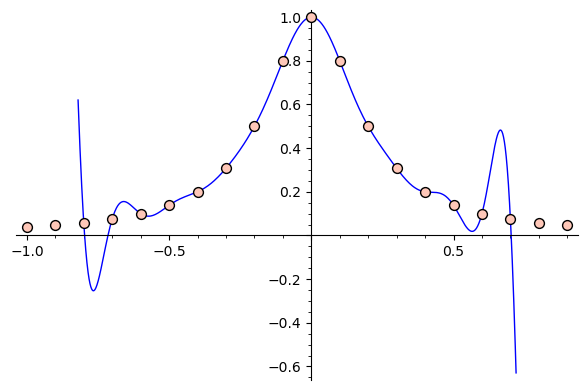

In [2]:
R = [x/10 for x in range(-10,10)]
L = [1/(1+25*x^2) for x in R]
points = [(R[i], L[i]) for i in range(len(L))]
polring.<x> = RR[]
lp = polring.lagrange_polynomial(points)

show(plot(lp, -0.82, 0.72) + scatter_plot(points))

This particular example is called [Runge's phenomenon](https://en.wikipedia.org/wiki/Runge%27s_phenomenon). For a better approximation you can use a [spline](https://en.wikipedia.org/wiki/Spline_(mathematics)), which is a *piecewise* polynomial function:

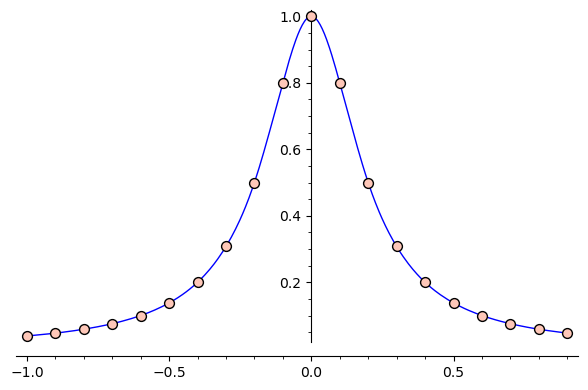

In [90]:
show(plot(spline(points), -1, 1) + scatter_plot(points))

A detailed explanation of splines is a good topic for a course of numerical analysis. For this course it is enough that you know that they exist and they can be plotted.